# Collatz alpha theorems

This notebook validates several theorems on the $\alpha$ of Collatz sequences

## Meta data

In [1]:
"""
This notebook is used to validate several theorems on the alphas (divisions by two)
of Collatz sequences. It builds on a sample of sequences, stored in the csv file:
data/alpha_export.csv. The file can be generated by executing the script
run_alpha_export.py.
"""

# Imports
from pathlib import Path
from math import ceil
import matplotlib.pyplot as plt
import pandas as pd

# Configuration
DATA_PATH = Path.cwd().parent.as_posix() + "/data/"
CSV_PATH = DATA_PATH + "alpha_export.csv"
OUTPUT_PATH = DATA_PATH + "alpha_min.csv"
SAVE_RESULTS = False

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Load data from csv
analysis_frame = pd.read_csv(
    CSV_PATH, dtype={"v_i": object, "kv_i+1": object, "v_i+" : object})

sequence_count = int(analysis_frame["sequence_id"].nunique())

print("Collatz sequences loaded from file:", sequence_count, "\n")
print("Count of Collatz values:", len(analysis_frame), "\n")
print("Max sequence length:", analysis_frame["sequence_len"].max(), "\n")
print("Min sequence length:", analysis_frame["sequence_len"].min())

Collatz sequences loaded from file: 10000 

Count of Collatz values: 651159 

Max sequence length: 100 

Min sequence length: 1


## Analysis of $\alpha_i$

Min: 1
Max: 20
Boundaries valid: True


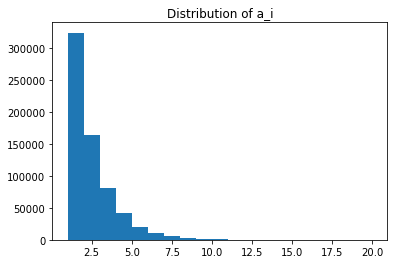

In [2]:
a_i_max = (analysis_frame["a_i"]).max()
a_i_min = (analysis_frame["a_i"]).min()

min_value_valid = (analysis_frame["a_i"] < 1).sum() == 0
max_value_valid = (analysis_frame["a_i"] > analysis_frame["a_i_max"]).sum() == 0

print("Min:", a_i_min)
print("Max:", a_i_max)
print("Boundaries valid:", min_value_valid and max_value_valid)

# Plot distribution
bins = ceil(a_i_max - a_i_min)

plt.figure()
plt.title("Distribution of a_i")
plt.hist(analysis_frame["a_i"], bins = bins)
plt.show()

## Analysis of $\alpha$

Min: 1
Max: 245
Boundaries valid: True


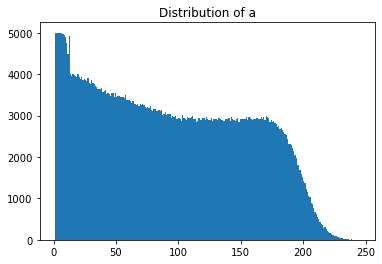

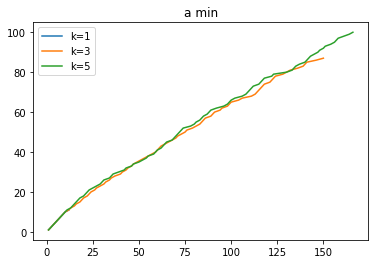

In [3]:
a_max = (analysis_frame["a"]).max()
a_min = (analysis_frame["a"]).min()

a_min_value_valid = (analysis_frame["a"] < analysis_frame["n"]).sum() == 0
a_max_value_valid = (analysis_frame["a"] > analysis_frame["a_max"]).sum() == 0

print("Min:", a_min)
print("Max:", a_max)
print("Boundaries valid:", a_min_value_valid and a_max_value_valid)

# Plot distribution
bins = ceil(a_max - a_min)

plt.figure()
plt.title("Distribution of a")
plt.hist(analysis_frame["a"], bins = bins)
plt.show()

minimum_frame = analysis_frame.groupby(["k", "n"])["a"].min().reset_index()

plt.figure()
plt.title("a min")
plt.plot(
    minimum_frame[minimum_frame["k"] == 1]["a"], 
    minimum_frame[minimum_frame["k"] == 1]["n"], label="k=1")

plt.plot(
    minimum_frame[minimum_frame["k"] == 3]["a"], 
    minimum_frame[minimum_frame["k"] == 3]["n"], label="k=3")

plt.plot(
    minimum_frame[minimum_frame["k"] == 5]["a"], 
    minimum_frame[minimum_frame["k"] == 5]["n"], label="k=5")

plt.legend()
plt.show()

# Save aggregate frame
if SAVE_RESULTS:
    minimum_frame.to_csv(OUTPUT_PATH, index=False)
    print("Minimum alphas saved:" + OUTPUT_PATH)